# Fechting the dataset 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SCFInitialGuess.utilities.analysis import matrix_error

In [2]:
S, P = np.load("../data/dataset.npy")
dim = 26
p = list(P.reshape(-1, dim, dim))
s = list(S.reshape(-1, dim, dim))

# Check for symmetry

In [3]:
def symmetry_error(M):
    
    error = np.zeros(M[0].shape)
    for m in M:
        error += np.abs(m - np.transpose(m))
        
    return error / len(M)

## S -Matrix

0.0


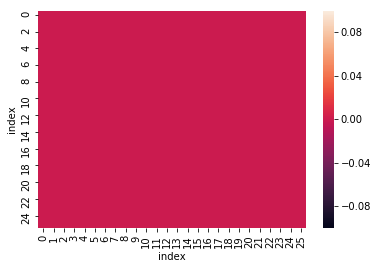

In [4]:
error = symmetry_error(s)
print(np.mean(error))
matrix_error(error)
plt.show()

## P-Matrix

1.1172350540602255e-18


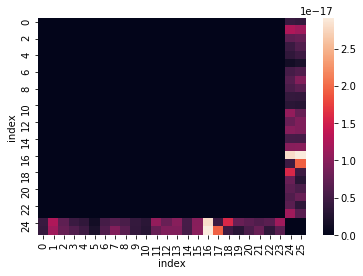

In [5]:
error = symmetry_error(p)
print(np.mean(error))
matrix_error(error)
plt.show()

# Verrauschte p matix

0.0010875155627061155


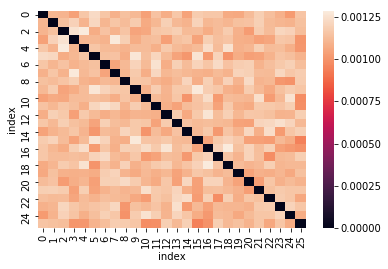

In [6]:
p_noise = list((P + np.random.randn(*P.shape) * 1e-3).reshape(-1, dim, dim))
error = symmetry_error(p_noise)
print(np.mean(error))
matrix_error(error)
plt.show()

# Idempotency

$$PSP^T-2P=0$$,
Faktor 2 wegen Definition/Besetzung

In [7]:
def idempotency_error(M):
    
    error = np.zeros(M[0].shape)
    for m in M:
        error += np.abs(m - np.dot(m, m))
        
    return error / len(M)

def weighted_idempotency_eror(M, W):
    
    error = np.zeros(M[0].shape)
    for m, w in zip(M, W):
        error += np.abs(2 * m - np.dot(m, np.dot(w, m)))
        
    return error / len(M)
    

In [8]:
def mc_wheeny_purification(p,s):
    p = p.reshape(dim, dim)
    s = s.reshape(dim, dim)
    return (3 * np.dot(np.dot(p, s), p) - np.dot(np.dot(np.dot(np.dot(p, s), p), s), p)) / 2

def mc_wheeny_purification_2(p, s=None):
    p = p.reshape(dim, dim)
    return 3 * np.dot(p, p) - 2 * np.dot(np.dot(p, p), p)

def idemp_error(p, s):
    p = p.reshape(dim, dim)
    s = s.reshape(dim, dim)
    return np.mean((np.abs(p @ s @ p.T - 2 * p)))


    
    
                   

## P matrix

3.24719630914608e-16


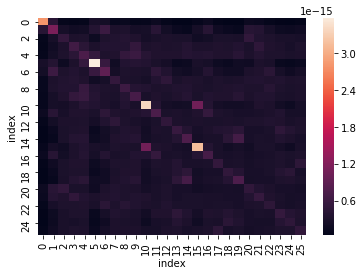

In [9]:
error = weighted_idempotency_eror(p, s)
print(np.mean(error))
matrix_error(error)
plt.show()

## P matrix w/ noise

0.0011664983574595186


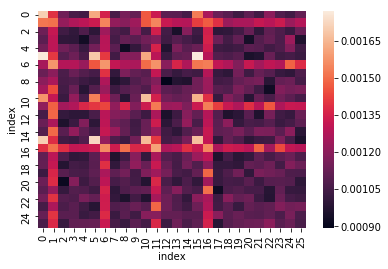

In [10]:
error = weighted_idempotency_eror(p_noise, s)
print(np.mean(error))
matrix_error(error)
plt.show()

# Check occupancy
$$tr(PS) = N_{electrons}$$

In [26]:
def population(S, P):
    for i, (s,p) in enumerate(zip(S, P)):
        yield np.trace(np.dot(p, s))


## Normal

In [27]:
print(np.mean(list(population(s, p))))

30.0


## Verrauscht

In [28]:
print(np.mean(list(population(s, p_noise))))

29.999669494459816
